# 2차원 데이터의 정리

In [2]:
import numpy as np
import pandas as pd

%precision 3

'%.3f'

In [10]:
df = pd.read_csv('python_stat_sample-master/data/ch2_scores_em.csv',
                 index_col = 'student number')
df.shape, df.head(), 

((50, 2),
                 english  mathematics
 student number                      
 1                    42           65
 2                    69           80
 3                    56           63
 4                    41           63
 5                    57           76)

In [6]:
en_scores = np.array(df['english'])[:10]
ma_scores = np.array(df['mathematics'])[:10]

In [7]:
scores_df = pd.DataFrame({'english' : en_scores,
                          'mathematics' : ma_scores},
                         index = pd.Index(['A', 'B', 'C', 'D', 'E',
                                           'F', 'G', 'H', 'I', 'J'],
                                          name = 'student'))
scores_df.head()

,english,mathematics
student,,
A,42,65
B,69,80
C,56,63
D,41,63
E,57,76


### 
### 두 데이터 사이의 관계를 나타내는 지표
- A가 높을수록 B가 높은 경향이 있다면, A와 B는 **양의 상관**
- A가 높을수록 B가 낮은 경향이 있다면, A와 B는 **음의 상관**
- 어느쪽도 해당하지 않을때, **무상관**

### 공분산 : 양의 상관관계에 있다고 생각되는 데이터의 관계성을 수치화

### $S_{xy} $ 
### $ =  {1 \over n} \displaystyle\sum_{i=1}^{n}{(x_i - \bar{x})^2 (y_i - \bar{y})^2} $
### $ = {1 \over n}[(x_1 - \bar{x})(y_1 - \bar{y}) + (x_2 - \bar{x})(y_2 - \bar{y}) + ... (x_n - \bar{x})(y_n - \bar{y})]$


- 직사각형의 가로 / 세로 길이는 각 점수의 편차
- **공분산이 분산과 다른 점은, 가로축과 세로축의 데이터가 다르기 때문에 편차들로 만든 도형이 직사각형이 될 뿐만 아니라 음의 면적도 얻을 수 있다는 점**
- **공분산에서는 가로와 세로의 데이터가 다르므로, 한쪽은 편차가 양의 값, 다른 한쪽은 편차가 음의 값인 경우에 면적이 음의 값이 됨**

#### 즉, '부호를 붙인 면적'이라는 관점에서, 면적이 양의 값이 되는 것은 두 점수가 모두 평균 점수보다 높거나 낮은 경우이기 때문에, 점수의 상관관계를 표현
#### 부호를 붙인 면적의 평균은 상관의 지표 => 공분산

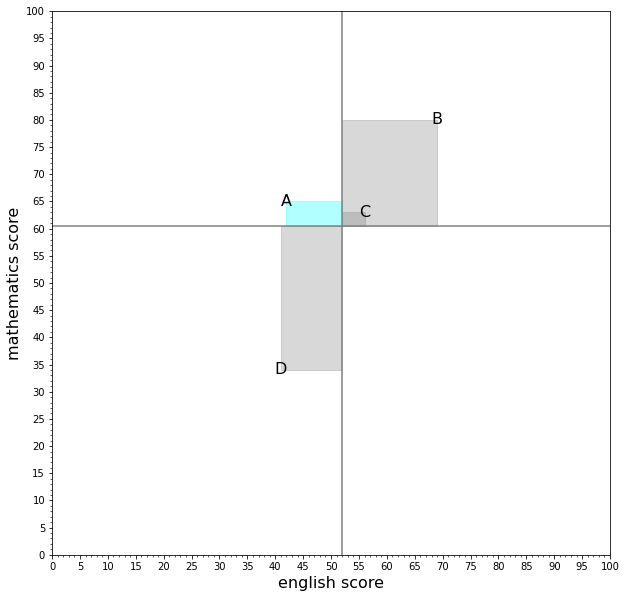

### 
#### 공분산 계산

In [4]:
summary_df = scores_df.copy()
summary_df['english_deviation'] =\
    summary_df['english'] - summary_df['english'].mean()

summary_df['mathematics_deviation'] =\
    summary_df['mathematics'] - summary_df['mathematics'].mean()

summary_df['product of deviations'] =\
    summary_df['english_deviation'] * summary_df['mathematics_deviation']

summary_df

,english,mathematics,english_deviation,mathematics_deviation,product of deviations
student,,,,,
A,42,65,-13.0,-6.4,83.2
B,69,80,14.0,8.6,120.4
C,56,63,1.0,-8.4,-8.4
D,41,63,-14.0,-8.4,117.6
E,57,76,2.0,4.6,9.2
F,48,60,-7.0,-11.4,79.8
G,65,81,10.0,9.6,96.0
H,49,66,-6.0,-5.4,32.4
I,65,78,10.0,6.6,66.0


In [5]:
summary_df['product of deviations'].mean()

62.800

### ```np.cov()``` : 공분산 행렬 반환
- 공분산 = 공분산 행렬의 대각원소
- 대각원소를 제외한 원소들은 각 변수들의 분산

In [14]:
cov_mat = np.cov(en_scores, ma_scores, ddof = 0)
cov_mat, cov_mat[0, 1], cov_mat[1, 0]

(array([[86.  , 62.8 ],
        [62.8 , 68.44]]),
 62.800,
 62.800)

In [13]:
cov_mat[0, 0], cov_mat[1, 1], np.var(en_scores, ddof = 0), np.var(ma_scores, ddof = 0)

(86.000, 68.440, 86.000, 68.440)

### 
### 상관계수 : 단위에 의존하지 않는 상관관계를 나타내는 지표
- **공분산은 각 데이터의 단위를 데이터를 곱한 것 => 공분산을 각 데이터의 표준편차로 나눔**

### $r_{xy} = {S_{xy} \over {S_x S_y}} $
$= {1 \over n} \displaystyle\sum_{i=1}^{n}{{(x_i - \bar{x}) \over S_x} {(y_i - \bar{y}) \over S_y}}$

- -1 ~ +1 사이의 값을 가짐
- 데이터가 양의 상관관계에 놓여 있을수록 1에 근점 / 음의 상관관게에 놓일수록 -1에 근점 / 무상관이면 0

In [15]:
np.cov(en_scores, ma_scores, ddof = 0)[0, 1] / (np.std(en_scores) * np.std(ma_scores))

0.819

### ```np.corrcoef()```, ```.corr()``` : 상관행렬 반환

In [16]:
np.corrcoef(en_scores, ma_scores)

array([[1.   , 0.819],
       [0.819, 1.   ]])

In [12]:
scores_df.corr()

,english,mathematics
english,1.000,0.819
mathematics,0.819,1.000


### 
## 2차원 데이터의 시각화

### 산점도
### ```ax.scatter(x, y)```

In [17]:
import matplotlib.pyplot as plt

%matplotlib inline

In [18]:
english_scores = np.array(df['english'])
math_scores = np.array(df['mathematics'])

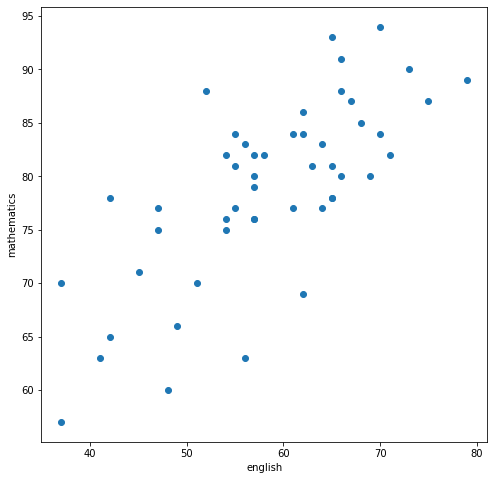

In [19]:
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(111)

ax.scatter(english_scores, math_scores)
ax.set_xlabel('english')
ax.set_ylabel('mathematics')

plt.show()

### 
### 회귀직선
### ```np.polyfit(X, Y)```, ```np.poly1d(poly_fit)```

- 계수$β_0$와 $β_1$를 구한다

In [22]:
poly_fit = np.polyfit(english_scores, math_scores, 1)
poly_fit

array([ 0.621, 42.601])

- $β_0$ + $β_{1 x}$를 반환하는 함수를 작성

In [23]:
poly_1d = np.poly1d(poly_fit),
poly_1d

(poly1d([ 0.621, 42.601]),)

- 직선을 그리기 위해 x좌표와 y좌표를 생성

In [34]:
xs = np.linspace(english_scores.min(), english_scores.max())
ys = np.linspace(math_scores.min(), math_scores.max())
xs, xs.shape, ys, ys.shape

(array([37.   , 37.857, 38.714, 39.571, 40.429, 41.286, 42.143, 43.   ,
        43.857, 44.714, 45.571, 46.429, 47.286, 48.143, 49.   , 49.857,
        50.714, 51.571, 52.429, 53.286, 54.143, 55.   , 55.857, 56.714,
        57.571, 58.429, 59.286, 60.143, 61.   , 61.857, 62.714, 63.571,
        64.429, 65.286, 66.143, 67.   , 67.857, 68.714, 69.571, 70.429,
        71.286, 72.143, 73.   , 73.857, 74.714, 75.571, 76.429, 77.286,
        78.143, 79.   ]),
 (50,),
 array([57.   , 57.755, 58.51 , 59.265, 60.02 , 60.776, 61.531, 62.286,
        63.041, 63.796, 64.551, 65.306, 66.061, 66.816, 67.571, 68.327,
        69.082, 69.837, 70.592, 71.347, 72.102, 72.857, 73.612, 74.367,
        75.122, 75.878, 76.633, 77.388, 78.143, 78.898, 79.653, 80.408,
        81.163, 81.918, 82.673, 83.429, 84.184, 84.939, 85.694, 86.449,
        87.204, 87.959, 88.714, 89.469, 90.224, 90.98 , 91.735, 92.49 ,
        93.245, 94.   ]),
 (50,))

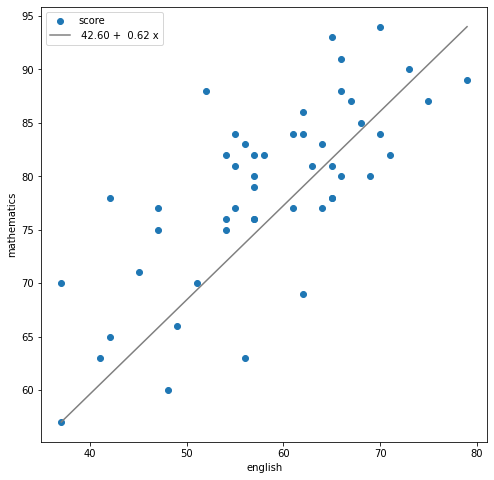

In [32]:
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(111)

ax.set_xlabel('english')
ax.set_ylabel('mathematics')

ax.scatter(english_scores, math_scores, label = 'score')
ax.plot(xs, ys, color = 'gray',
        label = f'{poly_fit[1] : .2f} + {poly_fit[0] : .2f} x')

ax.legend(loc = 'upper left') # 범례의 표시

plt.show()

### 
### 히트맵
### ```ax.hist2d(x, y, bins, range)```
- ```bins``` : 히트맵의 차원
- ```range``` : 히트맵 각축의 범위, bins의 각 값들로 나눔

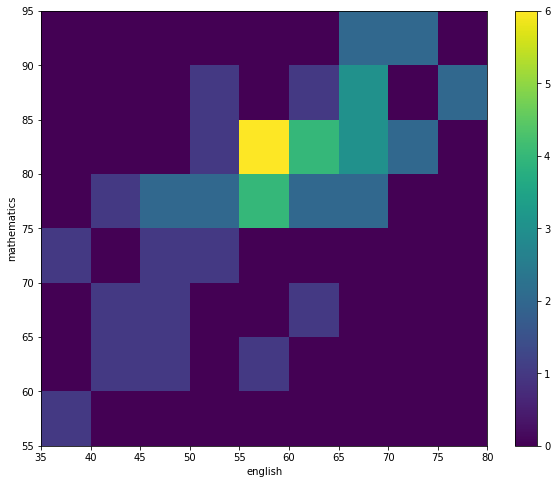

In [38]:
fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(111)

# x축은 35 ~ 80까지 9개의 균등 간격 (5점 간격)
# y축은 55 ~ 95까지 8개의 균등 간격 (5점 간격)
c = ax.hist2d(english_scores, math_scores,
              bins = [9, 8], range = [(35, 80), (55, 95)])

ax.set_xlabel('english')
ax.set_ylabel('mathematics')

ax.set_xticks(c[1])
ax.set_yticks(c[2])

fig.colorbar(c[3], ax=ax) # 컬러 바의 표시

plt.show()

### 
## 앤스컴의
- **동일한 지표를 가지고 있지만, 전혀 다른 데이터가 되는 예**
- 분포나 그래프를 이용하여 전혀 다른 4개의 데이터 세트를 의미

In [39]:
anscombe_data = np.load('python_stat_sample-master/data/ch3_anscombe.npy')
print(anscombe_data.shape)
anscombe_data[0]

(4, 11, 2)


array([[10.  ,  8.04],
       [ 8.  ,  6.95],
       [13.  ,  7.58],
       [ 9.  ,  8.81],
       [11.  ,  8.33],
       [14.  ,  9.96],
       [ 6.  ,  7.24],
       [ 4.  ,  4.26],
       [12.  , 10.84],
       [ 7.  ,  4.82],
       [ 5.  ,  5.68]])

#### 각 데이터의 평균, 분산, 상관계수, 회귀직선을 계산하여 DataFrame으로 정리

In [42]:
stats_df = pd.DataFrame(index=['X_mean', 'X_variance', 'Y_mean',
                               'Y_variance', 'X&Y_correlation',
                               'X&Y_regression line'])

In [41]:
for i, data in enumerate(anscombe_data):
    dataX = data[:, 0]
    dataY = data[:, 1]
    poly_fit = np.polyfit(dataX, dataY, 1)
    stats_df[f'data{i + 1}'] =\
        [f'{np.mean(dataX) : .2f}',
         f'{np.var(dataX) : .2f}',
         f'{np.mean(dataY) : .2f}',
         f'{np.var(dataY) : .2f}',
         f'{np.corrcoef(dataX, dataY)[0, 1] : .2f}',
         f'{poly_fit[1] : .2f} + {poly_fit[0] : .2f}x']
stats_df

,data1,data2,data3,data4
X_mean,9.00,9.00,9.00,9.00
X_variance,10.00,10.00,10.00,10.00
Y_mean,7.50,7.50,7.50,7.50
Y_variance,3.75,3.75,3.75,3.75
X&Y_correlation,0.82,0.82,0.82,0.82
X&Y_regression line,3.00 + 0.50x,3.00 + 0.50x,3.00 + 0.50x,3.00 + 0.50x


- 모든 데이터가 평균부터 회귀직선 식까지 전부 일치
- **결국 지표상으로 보면 네 가지 데이터는 모두 동일**

### 
#### 산점도 생성

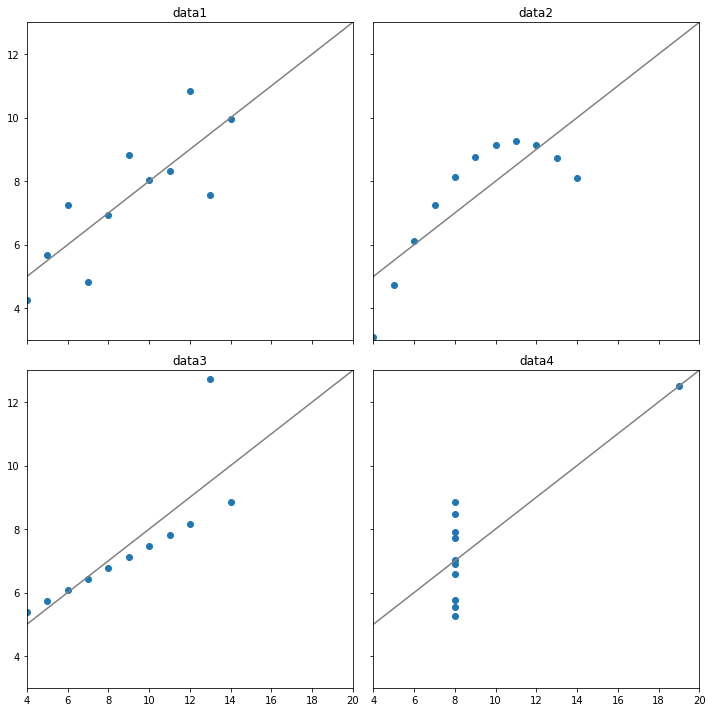

In [44]:
# 그래프를 그리기 위한 영역을 2x2개 생성
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10, 10),
                         sharex = True, sharey = True)

xs = np.linspace(0, 30, 100)

for i, data in enumerate(anscombe_data):
    poly_fit = np.polyfit(data[:,0], data[:,1], 1)
    poly_1d = np.poly1d(poly_fit)
    ys = poly_1d(xs)
    
    # 그리는 영역을 선택
    ax = axes[i // 2, i % 2]
    ax.set_xlim([4, 20])
    ax.set_ylim([3, 13])
    
    # 타이틀을 부여
    ax.set_title(f'data{i + 1}')
    ax.scatter(data[:,0], data[:,1])
    ax.plot(xs, ys, color = 'gray')

# 그래프 사이의 간격을 좁힘
plt.tight_layout()
plt.show()